In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [75]:
df_videos = pd.read_csv('../files/videos_info.csv')
# df_videos = pd.read_csv('../files 20240922_204522/videos_info.csv')
df_videos.columns = ['video_id','title','description','channel_id','published_at','category_id','tags','view_count','like_count','comment_count','duration','definition','caption','licensed_content','privacy_status','license','embeddable','public_stats_viewable','is_made_for_kids','thumbnail_url','default_audio_language','default_language','actual_start_time','scheduled_start_time','actual_end_time','scheduled_end_time','concurrent_viewers','active_live_chat_id','recording_date','topicCategories','processing_status','parts_total','parts_processed','time_left_ms','processing_failure_reason']
df_videos = df_videos.drop(columns=['description','channel_id','tags','duration','definition','caption','licensed_content','privacy_status','license','embeddable','public_stats_viewable','is_made_for_kids','thumbnail_url','default_audio_language','default_language','actual_start_time','scheduled_start_time','actual_end_time','scheduled_end_time','concurrent_viewers','active_live_chat_id','recording_date','topicCategories','processing_status','parts_total','parts_processed','time_left_ms','processing_failure_reason'])

df_videos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       166 non-null    object
 1   title          166 non-null    object
 2   published_at   166 non-null    object
 3   category_id    166 non-null    int64 
 4   view_count     166 non-null    int64 
 5   like_count     166 non-null    int64 
 6   comment_count  166 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 9.2+ KB


In [27]:
df_videos.head()

,video_id,title,published_at,category_id,view_count,like_count,comment_count
0,Eoa7qzQB_fI,Como Estudar Python + Curso Gratuito,2021-12-09T13:00:11Z,28,55078,4560,117
1,tYQyctZCAfU,Curso de Programação Grátis algoritmos e estru...,2021-12-28T22:00:31Z,27,373,20,4
2,rIVvpPK7pP8,Pydroid 3 📱Como Aprender python do Celular ? #...,2021-12-31T17:00:34Z,27,10721,692,7
3,UwGwdjjz-Sk,How To Print Hello World in Python #shorts #co...,2021-12-10T02:40:43Z,26,30706,584,12
4,3zBYlBPa34U,"PYTHON vs JAVA - “Olá, Mundo!”",2021-12-13T00:45:41Z,28,478327,21537,1144


In [29]:
df_videos_sorted = df_videos.sort_values(by='view_count', ascending=False)
df_videos_sorted.head()

,video_id,title,published_at,category_id,view_count,like_count,comment_count
15,oFtx79Cy2GA,Java vs Bedrock,2021-12-27T11:00:19Z,24,8595003,109551,2865
47,m2dSDjZtxww,java vs bedrock v11,2021-12-27T04:50:01Z,20,7687947,88374,1273
163,Q1wp2b7PiAo,How To Make MCPE Looks Like Java Edition/Pc,2021-11-25T05:30:02Z,20,6747641,403250,1560
38,vz09MKSFDDs,"Chronic Law, Java - Me Alone (Official Video)",2021-12-17T17:00:11Z,10,6067133,48862,1344
14,2rvReB7tabk,java vs bedrock v10,2021-12-19T17:28:37Z,20,5356386,66651,1829


In [30]:
total_comments = df_videos['comment_count'].sum()
print(f"Total de comentários: {total_comments}")

Total de comentários: 46665


In [59]:
pd.options.display.float_format = '{:,.2f}'.format
df_videos['view_count'].describe()

count         166.00
mean      495,949.58
std     1,392,887.18
min            27.00
25%         3,010.25
50%        14,144.00
75%       118,361.50
max     8,595,003.00
Name: view_count, dtype: float64

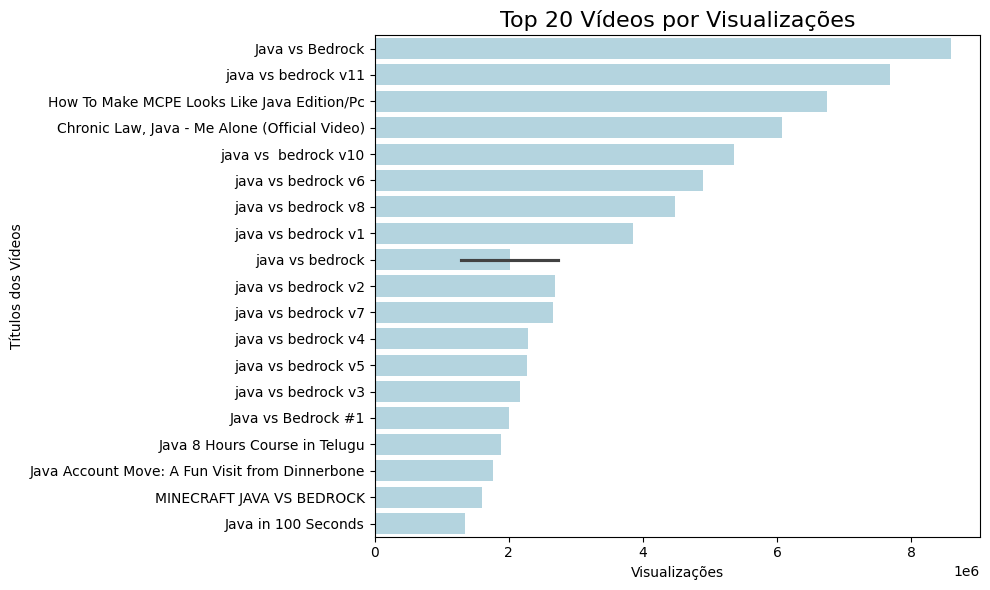

In [65]:
df_videos_sorted = df_videos.sort_values(by='view_count', ascending=False)
top_20_videos = df_videos_sorted.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='view_count', y='title', data=top_20_videos, color='lightblue')  # Remover 'hue'
plt.title('Top 20 Vídeos por Visualizações', fontsize=16)
plt.xlabel('Visualizações')
plt.ylabel('Títulos dos Vídeos')
plt.tight_layout()
plt.savefig("top20_videos_views_graph.png")
plt.show()


In [60]:
df_videos['like_count'].describe()

count       166.00
mean     11,595.86
std      38,195.36
min           3.00
25%         127.25
50%         657.00
75%       4,057.50
max     403,250.00
Name: like_count, dtype: float64

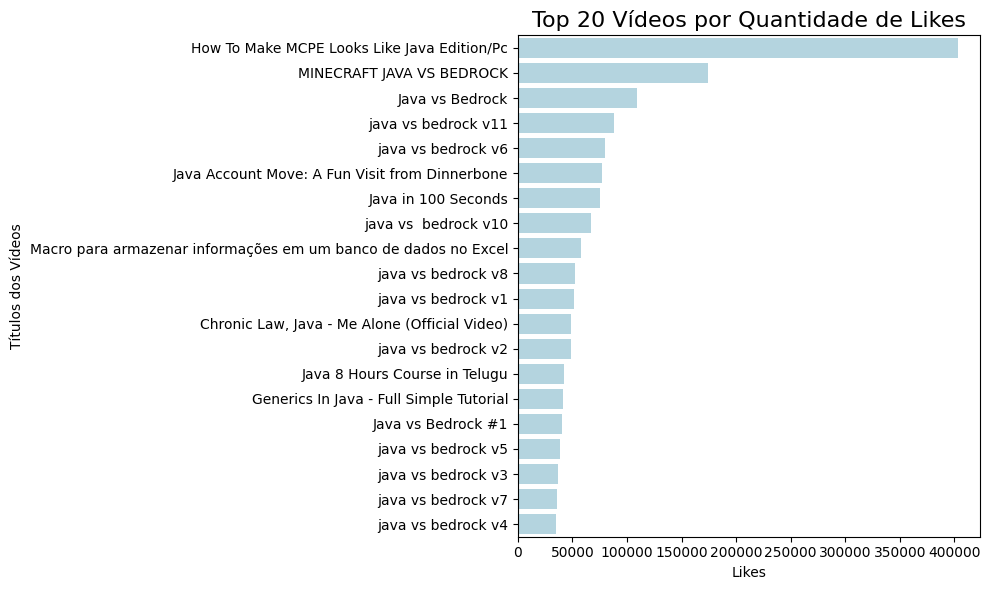

In [66]:
df_videos_sorted = df_videos.sort_values(by='like_count', ascending=False)
top_20_videos = df_videos_sorted.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='like_count', y='title', data=top_20_videos, color='lightblue')  # Remover 'hue'
plt.title('Top 20 Vídeos por Quantidade de Likes', fontsize=16)
plt.xlabel('Likes')
plt.ylabel('Títulos dos Vídeos')
plt.tight_layout()
plt.savefig("top20_videos_likes_graph.png")
plt.show()


In [61]:
df_videos['comment_count'].describe()

count     166.00
mean      281.11
std       640.55
min         1.00
25%         7.00
50%        31.00
75%       149.25
max     4,684.00
Name: comment_count, dtype: float64

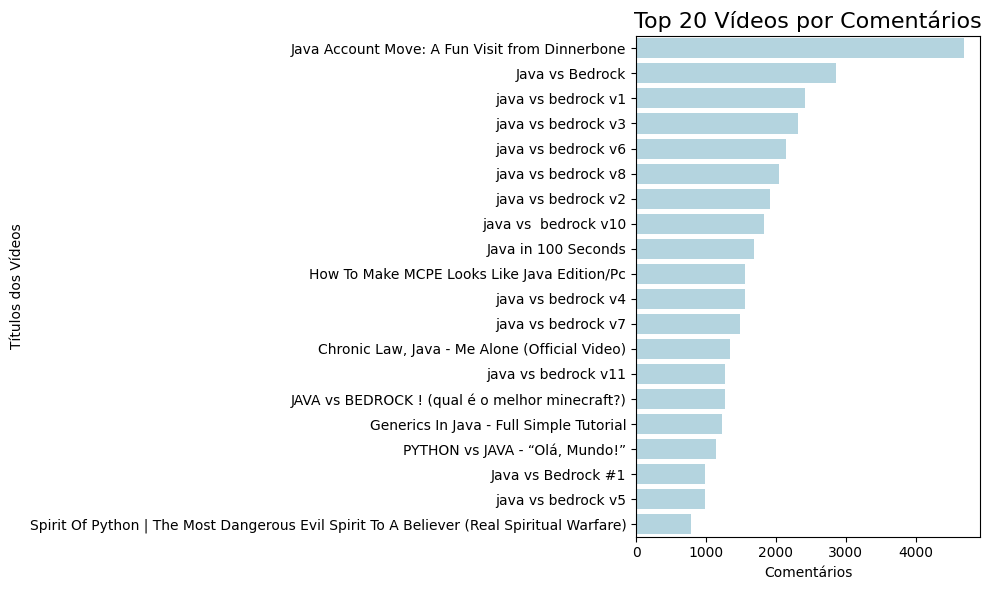

In [67]:
df_videos_sorted = df_videos.sort_values(by='comment_count', ascending=False)
top_20_videos = df_videos_sorted.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='comment_count', y='title', data=top_20_videos, color='lightblue')  # Remover 'hue'
plt.title('Top 20 Vídeos por Comentários', fontsize=16)
plt.xlabel('Comentários')
plt.ylabel('Títulos dos Vídeos')
plt.tight_layout()
plt.savefig("top20_videos_comments_graph.png")
plt.show()


## comentários - nuvem de palavras

In [39]:
df_comments = pd.read_csv('../files/comments_info.csv')
df_comments.columns = ['video_id','comment_id','author','author_profile_image_url','author_channel_url','author_channel_id','comment','published_at','updated_at','like_count','viewer_rating','can_rate','is_reply','parent_id','channel_id']
df_comments = df_comments.drop(columns=['author_profile_image_url','author_channel_url','author_channel_id','updated_at','viewer_rating','can_rate','is_reply','parent_id','channel_id'])

df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44971 entries, 0 to 44970
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      44971 non-null  object
 1   comment_id    44971 non-null  object
 2   author        44944 non-null  object
 3   comment       44957 non-null  object
 4   published_at  44971 non-null  object
 5   like_count    44971 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [32]:
df_comments.head()

,video_id,comment_id,author,comment,published_at,like_count
0,Eoa7qzQB_fI,UgyI7WFL_tq0Z86x_Il4AaABAg,@DevAprender,E ai conseguiu entender como começar agora?\n✅...,2021-12-09T11:08:57Z,22
1,Eoa7qzQB_fI,Ugye0f4HYHvRx5PhAwJ4AaABAg,@LaTeeX.,"Opa Professor, a sua playlist esta em ordem de...",2024-05-26T11:33:42Z,0
2,Eoa7qzQB_fI,Ugye0f4HYHvRx5PhAwJ4AaABAg.A3u1nPG3K57A3ue4RpJIAu,@DevAprender,"não tem uma ordem exata, é mais um compilado d...",2024-05-26T17:16:57Z,0
3,Eoa7qzQB_fI,UgzIOfscfF3HD00A1WB4AaABAg,@zenoni9823,Show,2024-04-08T04:22:09Z,0
4,Eoa7qzQB_fI,UgwtzQQsA5zEb8GCk_J4AaABAg,@felipecarvalho2864,😍,2023-12-21T04:04:07Z,0


In [33]:
df_comments_sorted = df_comments.sort_values(by='like_count', ascending=False)

df_comments_sorted.head()

,video_id,comment_id,author,comment,published_at,like_count
36710,l9AzO1FMgM8,UgwX-ZAbIEih7otnVm94AaABAg,@ShortHax,"Ok ladies and gentlemen, I am ready to make Mi...",2021-11-03T16:25:21Z,11017
36280,l9AzO1FMgM8,UgxJzvCdCUJ8bjNQb3x4AaABAg,@FGj-xj7rd,"""public static void main"" These words together...",2021-11-03T16:51:22Z,8136
40706,PpF8AaPyqhQ,UgxAmHRzVKWOZOleRgh4AaABAg,@onebilliontacos3405,"You know, it really is strange seeing dinnerbo...",2021-11-24T16:56:00Z,6610
40512,PpF8AaPyqhQ,Ugx2catMDcoD4h6cWdd4AaABAg,@iStealth.,Free capes is always the answer to every minec...,2021-11-24T17:28:45Z,6527
33081,WsgeYUgcxzI,UgxMmtvajYDxr1ObXVB4AaABAg,@LoradLP,Inconsistent use of brackets\nFirst expression...,2021-12-28T18:29:44Z,5623


In [37]:
df_comments_sorted_oldest = df_comments.sort_values(by='published_at', ascending=True)
df_comments_sorted_oldest.head()

,video_id,comment_id,author,comment,published_at,like_count,cleanText
42004,PpF8AaPyqhQ,Ugyc1z13B4yWgKLwLOR4AaABAg,@nicolas_ang,mort de rigole y'a personne qui a cliqué :)\nl...,2021-08-25T18:08:15Z,1,mort de rigole y'a personne qui a cliqué :)\nl...
42003,PpF8AaPyqhQ,UgwvjiG-w3_16he11gx4AaABAg,@matveiytskill2233,а,2021-08-25T18:09:42Z,0,а
42001,PpF8AaPyqhQ,Ugwh2R8-MgGvuXa5zZ54AaABAg,@matveiytskill2233,Сoool,2021-08-25T18:09:55Z,0,Сoool
42000,PpF8AaPyqhQ,UgzXO6T0SazSI2tt4VF4AaABAg,@flopperprincess357,sus,2021-08-25T19:30:21Z,0,sus
41999,PpF8AaPyqhQ,UgyZUSIM1hipurlVSJR4AaABAg,@SoyKevon,hi,2021-08-25T20:39:07Z,0,hi


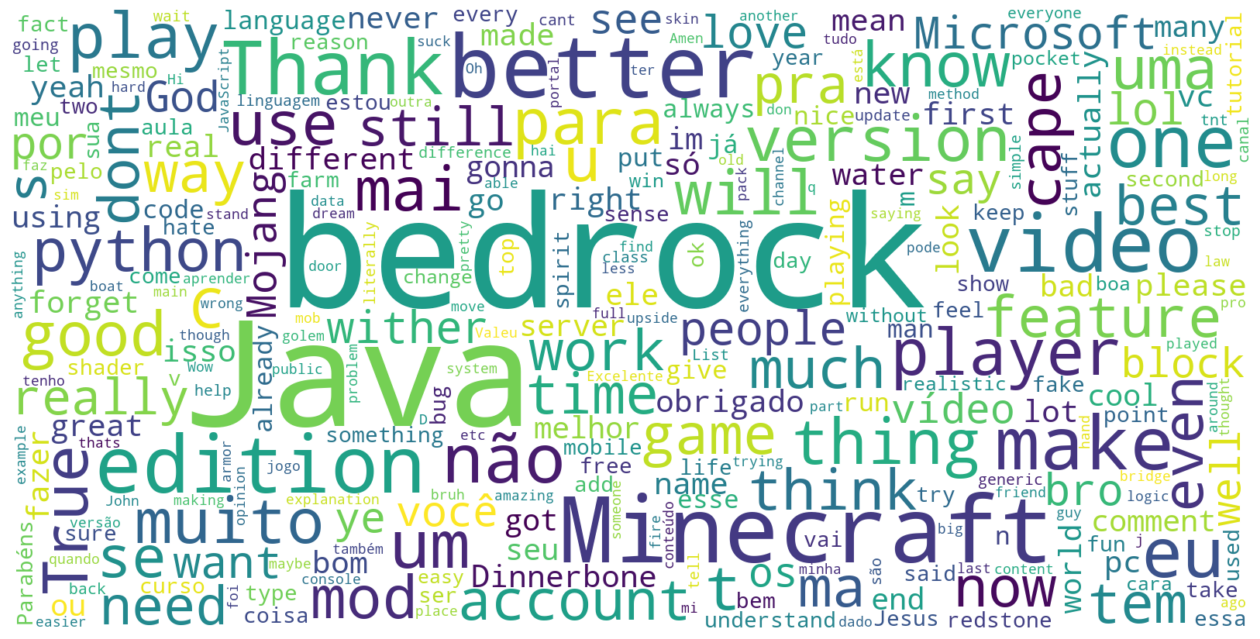

In [38]:
df_nuvem = df_comments  

df_nuvem['cleanText'] = df_nuvem['comment'].apply(lambda x: re.split(r'https:\/\/.*', str(x))[0])
string = pd.Series(df_nuvem['cleanText'].values).str.cat(sep=' ')
caracteres = "#@\n"
for i in range(len(caracteres)):
    string = string.replace(caracteres[i], "")
    
stopwords = set(STOPWORDS)

stopwords.update(["é", "a", "de", "o", "e", "em", "que", "na", "como", "da"]) 

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, max_words=300,
                      stopwords=stopwords, collocations=False, background_color='white').generate(string)

plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [62]:
wordcloud.to_file("wordcloud_programacao_dados.png")